# Q2. Practice with PCA

# 1. Dataset loading

In [1]:
import pandas as pd

# Load dataset (replace 'file_path' with the actual path to your dataset)
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/roles_life_cycle_mapping_wide.csv')

# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Job_Title                                  52 non-null     object
 1   Flag                                       52 non-null     int64 
 2   L1_Business opportunity                    52 non-null     int64 
 3   L2_Find data sources                       52 non-null     int64 
 4   L3_Explore and visualize data              52 non-null     int64 
 5   L4_Develop data (Clean Data)               52 non-null     int64 
 6   L5_Develop data (Feature-engineer)         52 non-null     int64 
 7   L6_Develop data (Collect additional data)  52 non-null     int64 
 8   L7_Train models                            52 non-null     int64 
 9   L8_Deploy best model                       52 non-null     int64 
 10  L9_Monitor and manage model usage       

# 2. Pre-processing

# Identifing non-numeric columns

In [3]:
# Check for non-numeric columns
print(df.dtypes)

Job_Title                                    object
Flag                                          int64
L1_Business opportunity                       int64
L2_Find data sources                          int64
L3_Explore and visualize data                 int64
L4_Develop data (Clean Data)                  int64
L5_Develop data (Feature-engineer)            int64
L6_Develop data (Collect additional data)     int64
L7_Train models                               int64
L8_Deploy best model                          int64
L9_Monitor and manage model usage             int64
L10_Measure success                           int64
L11_Retrain or retire model                   int64
dtype: object


# Handling non-numeric columns

In [4]:
# Drop non-numeric columns (for example, columns with string values like 'AI / ML Specialist')
df_cleaned = df.select_dtypes(include=[float, int])  # This will keep only numeric columns

# Check the cleaned dataset
print(df_cleaned.head())


   Flag  L1_Business opportunity  L2_Find data sources  \
0     1                        2                     3   
1     1                        3                     1   
2     1                        4                     1   
3     1                        3                     2   
4     1                        1                     1   

   L3_Explore and visualize data  L4_Develop data (Clean Data)  \
0                              4                             3   
1                              1                             1   
2                              1                             0   
3                              2                             1   
4                              2                             1   

   L5_Develop data (Feature-engineer)  \
0                                   3   
1                                   1   
2                                   1   
3                                   2   
4                                   2   

   L6_D

# Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Convert the scaled data into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_cleaned.columns)

# Verify the scaling by checking the mean and standard deviation
print(scaled_df.mean())  # Should be close to 0
print(scaled_df.std())   # Should be close to 1


Flag                                        -3.416071e-17
L1_Business opportunity                     -1.323727e-16
L2_Find data sources                        -5.337611e-18
L3_Explore and visualize data                2.775558e-17
L4_Develop data (Clean Data)                -1.110223e-16
L5_Develop data (Feature-engineer)          -9.821204e-17
L6_Develop data (Collect additional data)    8.753682e-17
L7_Train models                             -4.270089e-18
L8_Deploy best model                         3.629575e-17
L9_Monitor and manage model usage            8.753682e-17
L10_Measure success                          4.910602e-17
L11_Retrain or retire model                  7.686159e-17
dtype: float64
Flag                                         1.009756
L1_Business opportunity                      1.009756
L2_Find data sources                         1.009756
L3_Explore and visualize data                1.009756
L4_Develop data (Clean Data)                 1.009756
L5_Develop data (Fe

# 3. Performing PCA

In [22]:
from sklearn.decomposition import PCA

# Initialize PCA (you can specify the number of components if needed)
pca = PCA()

# Fit PCA on the scaled data
pca.fit(scaled_df)

# Output the explained variance ratio for each principal component
print(pca.explained_variance_ratio_)


[1.02525310e-01 5.99781930e-02 3.36274074e-02 3.07733033e-02
 2.57220568e-02 2.17410934e-02 1.91913966e-02 1.87173333e-02
 1.84286530e-02 1.78195768e-02 1.74949487e-02 1.70606009e-02
 1.61842515e-02 1.61842515e-02 1.61842515e-02 1.61842515e-02
 1.61842515e-02 1.61842515e-02 1.61842515e-02 1.61842515e-02
 1.61842515e-02 1.61842515e-02 1.61842515e-02 1.61842515e-02
 1.61842515e-02 1.61842515e-02 1.61842515e-02 1.61842515e-02
 1.61842515e-02 1.61842515e-02 1.61842515e-02 1.61842515e-02
 1.61842515e-02 1.61842515e-02 1.61842515e-02 1.61842515e-02
 1.61842515e-02 1.61842515e-02 1.61842515e-02 1.61842515e-02
 1.61842515e-02 1.61842515e-02 1.61842515e-02 1.61842515e-02
 1.61842515e-02 1.61842515e-02 1.61842515e-02 1.61842515e-02
 1.61842515e-02 1.61842515e-02 1.91857109e-03 3.36436613e-33]


# 4. Scree plot

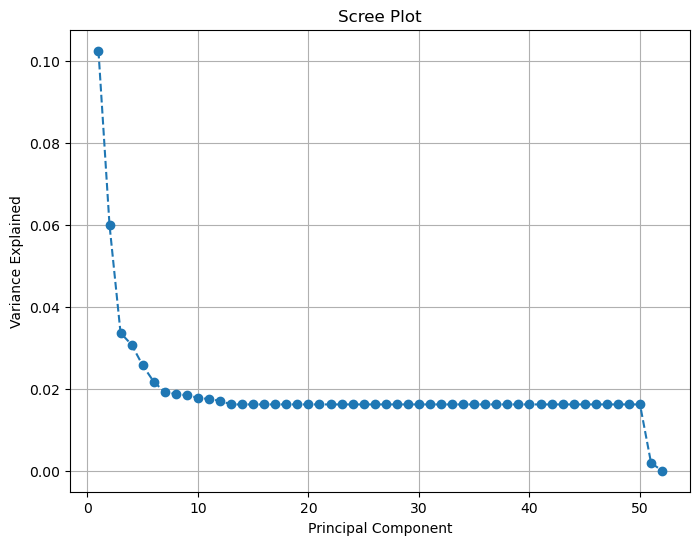

[0.10252531 0.1625035  0.19613091 0.22690421 0.25262627 0.27436736
 0.29355876 0.31227609 0.33070475 0.34852432 0.36601927 0.38307987
 0.39926412 0.41544838 0.43163263 0.44781688 0.46400113 0.48018538
 0.49636963 0.51255388 0.52873814 0.54492239 0.56110664 0.57729089
 0.59347514 0.60965939 0.62584364 0.6420279  0.65821215 0.6743964
 0.69058065 0.7067649  0.72294915 0.73913341 0.75531766 0.77150191
 0.78768616 0.80387041 0.82005466 0.83623891 0.85242317 0.86860742
 0.88479167 0.90097592 0.91716017 0.93334442 0.94952867 0.96571293
 0.98189718 0.99808143 1.         1.        ]
Number of components to retain: 48


In [10]:
import matplotlib.pyplot as plt

# Plot the scree plot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()

# Calculate the cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(cumulative_variance)

# Decide the number of components (e.g., choose components that explain >= 95% of the variance)
n_components = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95) + 1
print(f"Number of components to retain: {n_components}")


# 5. Output of the transformed data

In [11]:
# Transform the dataset to the new principal component space
transformed_data = pca.transform(scaled_df)

# Create a DataFrame with the transformed data
transformed_df = pd.DataFrame(transformed_data[:, :n_components], columns=[f'PC{i+1}' for i in range(n_components)])

# Show the transformed dataset
print(transformed_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.115841 -0.794160  0.029831  1.598573  0.266076 -0.487905  0.337158   
1 -2.223689 -3.271760  2.316441  1.820370 -1.234816  0.793458  0.166931   
2 -2.784240 -2.346692  3.726454  0.849257 -0.220941  0.767125 -0.787018   
3 -1.786295 -0.501905  2.373715  2.068507  0.303595  0.175033 -0.963882   
4 -0.247314 -3.123333  0.537282  3.249659  0.165129  1.846667 -0.142602   

        PC8       PC9      PC10  ...          PC39          PC40  \
0  0.038988 -0.128358 -0.094287  ... -1.801052e-16 -2.297133e-17   
1  1.299971  2.067419 -2.346628  ...  4.287963e-01  1.259714e-02   
2 -0.870556 -1.114990 -1.145900  ...  1.737472e-01  2.665318e-01   
3 -0.344832  0.823808  1.478757  ... -7.678168e-01 -2.486931e-01   
4  0.133863  1.159831  3.423918  ... -2.624373e-02  4.959934e-01   

           PC41          PC42          PC43          PC44          PC45  \
0 -2.143465e-16  6.773200e-17 -2.969636e-17  3.766327e-19 -3.6755

# 6. Scatter plot

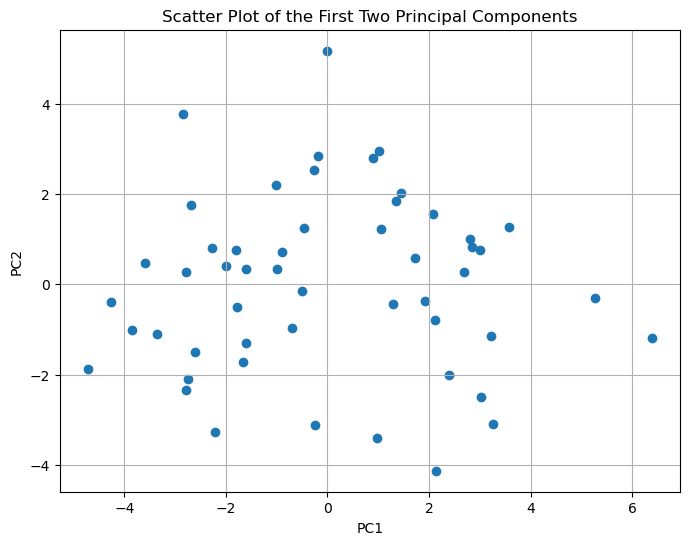

In [12]:
# Plot the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(transformed_df['PC1'], transformed_df['PC2'])
plt.title('Scatter Plot of the First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


# Q3. Feature selection

# Loading the dataset

In [13]:
import pandas as pd

# Load the dataset (replace 'BMI.csv' with your actual file path)
df = pd.read_csv('/Users/ananyasmaranikadivendi/Downloads/BMI.csv')

# Inspect the dataset to ensure it has the appropriate structure
print(df.head())

   Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  \
0   22   160.8    62.4  34.0   95.8     87.9   99.2   59.6  38.9   24.0   
1   22   170.6    80.5  38.5   93.6     83.0   98.7   58.7  37.3   23.4   
2   23   153.9    69.3  36.2   93.1     85.2   94.5   59.0  37.3   21.9   
3   23   157.1    70.4  35.5   92.1     77.1   93.9   56.1  36.1   22.7   
4   23   196.5    88.6  38.0   96.6     85.3  102.5   59.1  37.6   23.2   

   Biceps  Forearm  Wrist  fatpctg  
0    28.8     25.2   16.6     25.3  
1    30.5     28.9   18.2      6.1  
2    32.0     27.4   17.1     12.3  
3    30.5     27.2   18.2      9.4  
4    31.8     29.7   18.3     10.3  


# Checking for leading or trailing spaces in columns

In [15]:
# Remove leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check the column names again
print(df.columns)


Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'fatpctg'],
      dtype='object')


# Checking if the column 'age' exists before attempting to drop it

In [16]:
# Ensure 'age' exists in the DataFrame
if 'age' in df.columns:
    X = df.drop(columns=['fatpctg', 'age'])
else:
    X = df.drop(columns=['fatpctg'])
    
y = df['fatpctg']


# Wrapper Method - Recursive Feature Elimination - RFE

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model and RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)  # Set n_features_to_select to desired number of features

# Fit RFE on the data
rfe.fit(X, y)

# Get the top features
top_rfe_features = X.columns[rfe.support_]
print("Top features using RFE:", top_rfe_features)

Top features using RFE: Index(['Neck', 'Abdomen', 'Hip', 'Forearm', 'Wrist'], dtype='object')


# Embedded Method - Lasso Regularization

In [19]:
from sklearn.linear_model import Lasso

# Initialize Lasso model
lasso = Lasso(alpha=0.01)  # Alpha is the regularization parameter

# Fit Lasso model
lasso.fit(X, y)

# Get the coefficients of the features
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Select non-zero coefficients as the top features
top_lasso_features = lasso_coefficients[lasso_coefficients != 0].index
print("Top features using Lasso:", top_lasso_features)


Top features using Lasso: Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')


# Filter Method - Correlation with Target Variable

In [20]:
# Calculate the correlation of each feature with the target variable
correlation_matrix = X.corrwith(y)

# Select features with a correlation greater than a threshold (e.g., 0.2)
top_filter_features = correlation_matrix[correlation_matrix.abs() > 0.2].index
print("Top features using correlation filter:", top_filter_features)


Top features using correlation filter: Index(['Age', 'Weight', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee',
       'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')


# Output the Top Features

In [21]:
print("Top features from RFE:", top_rfe_features)
print("Top features from Lasso:", top_lasso_features)
print("Top features from correlation filter:", top_filter_features)


Top features from RFE: Index(['Neck', 'Abdomen', 'Hip', 'Forearm', 'Wrist'], dtype='object')
Top features from Lasso: Index(['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh',
       'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')
Top features from correlation filter: Index(['Age', 'Weight', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee',
       'Ankle', 'Biceps', 'Forearm', 'Wrist'],
      dtype='object')
